In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

In [210]:
dat = sqlite3.connect('HockeyDataBase.sqlite')
df = pd.read_sql_query('SELECT * FROM Performance',
                      dat,
                      index_col = ['Team_Name'])

In [211]:
df.head()

,Year_Played,Wins,Losses,OT_Losses,Goals_For,Goals_Against
Team_Name,,,,,,
Boston Bruins,1990,44,24,,299,264
Buffalo Sabres,1990,31,30,,292,278
Calgary Flames,1990,46,26,,344,263
Chicago Blackhawks,1990,49,23,,284,211
Detroit Red Wings,1990,34,38,,273,298


In [212]:
df.describe()

,Year_Played,Wins,Losses,Goals_For,Goals_Against
count,582.000000,582.000000,582.000000,582.000000,582.000000
mean,2000.907216,36.943299,32.353952,234.063574,234.063574
std,6.330674,8.926081,8.411439,40.548915,42.510718
min,1990.000000,9.000000,11.000000,115.000000,115.000000
25%,1996.000000,31.000000,27.000000,211.000000,207.000000
50%,2001.000000,38.000000,31.000000,231.000000,232.500000
75%,2007.000000,43.000000,37.000000,254.000000,258.750000
max,2011.000000,62.000000,71.000000,369.000000,414.000000


In [213]:
df.shape

(582, 6)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, Boston Bruins to Winnipeg Jets
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year_Played    582 non-null    int64 
 1   Wins           582 non-null    int64 
 2   Losses         582 non-null    int64 
 3   OT_Losses      582 non-null    object
 4   Goals_For      582 non-null    int64 
 5   Goals_Against  582 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 31.8+ KB


In [215]:
df['OT_Losses'] = pd.to_numeric(df['OT_Losses'])
df['OT_Losses'] = (df['OT_Losses'].fillna(0)).astype(int)

In [216]:
df['Win_Perc'] = round((df['Wins'] / (df['Wins'] + df['Losses']))*100, 2)

In [217]:
df['+-'] = df['Goals_For'] - df['Goals_Against']

In [218]:
df = df[['Year_Played', 'Wins', 'Losses','OT_Losses', 'Win_Perc', 'Goals_For', 'Goals_Against', '+-']]

In [219]:
df_top = df[df['Wins'] == df.groupby('Year_Played')['Wins'].transform(max)]
df_top

,Year_Played,Wins,Losses,OT_Losses,Win_Perc,Goals_For,Goals_Against,+-
Team_Name,,,,,,,,
Chicago Blackhawks,1990,49,23,0,68.06,284,211,73
New York Rangers,1991,50,25,0,66.67,321,246,75
Pittsburgh Penguins,1992,56,21,0,72.73,367,268,99
New York Rangers,1993,52,24,0,68.42,299,231,68
Detroit Red Wings,1994,33,11,0,75.00,180,117,63
Detroit Red Wings,1995,62,13,0,82.67,325,181,144
Colorado Avalanche,1996,49,24,0,67.12,277,205,72
Dallas Stars,1997,49,22,0,69.01,242,167,75
Dallas Stars,1998,51,19,0,72.86,236,168,68


In [250]:
df_top = df.reset_index()
df_top = df_top.sort_values(by=['Wins', '+-'], ascending = False)
df_top = df_top.groupby('Year_Played').first()[['Team_Name', 'Wins', 'Losses','OT_Losses', 'Win_Perc', 'Goals_For', 'Goals_Against', '+-']]
df_top.reset_index(inplace=True)
df_top.set_index('Team_Name', inplace=True)
df_top

,Year_Played,Wins,Losses,OT_Losses,Win_Perc,Goals_For,Goals_Against,+-
Team_Name,,,,,,,,
Chicago Blackhawks,1990,49,23,0,68.06,284,211,73
New York Rangers,1991,50,25,0,66.67,321,246,75
Pittsburgh Penguins,1992,56,21,0,72.73,367,268,99
New York Rangers,1993,52,24,0,68.42,299,231,68
Detroit Red Wings,1994,33,11,0,75.00,180,117,63
Detroit Red Wings,1995,62,13,0,82.67,325,181,144
Colorado Avalanche,1996,49,24,0,67.12,277,205,72
Dallas Stars,1997,49,22,0,69.01,242,167,75
Dallas Stars,1998,51,19,0,72.86,236,168,68


In [251]:
df_bottom = df.reset_index()
df_bottom = df_bottom.sort_values(['Wins','+-'])
df_bottom = df_bottom.groupby('Year_Played').first()[['Team_Name', 'Wins', 'Losses','OT_Losses', 'Win_Perc', 'Goals_For', 'Goals_Against', '+-']]
df_bottom.reset_index(inplace=True)
df_bottom.set_index('Team_Name', inplace=True)
df_bottom

,Year_Played,Wins,Losses,OT_Losses,Win_Perc,Goals_For,Goals_Against,+-
Team_Name,,,,,,,,
Quebec Nordiques,1990,16,50,0,24.24,236,354,-118
San Jose Sharks,1991,17,58,0,22.67,219,359,-140
Ottawa Senators,1992,10,70,0,12.50,202,395,-193
Ottawa Senators,1993,14,61,0,18.67,201,397,-196
Ottawa Senators,1994,9,34,0,20.93,117,174,-57
Ottawa Senators,1995,18,59,0,23.38,191,291,-100
Boston Bruins,1996,26,47,0,35.62,234,300,-66
Tampa Bay Lightning,1997,17,55,0,23.61,151,269,-118
Tampa Bay Lightning,1998,19,54,0,26.03,179,292,-113


Text(0.5, 1.0, 'Bar Chart for Goals')

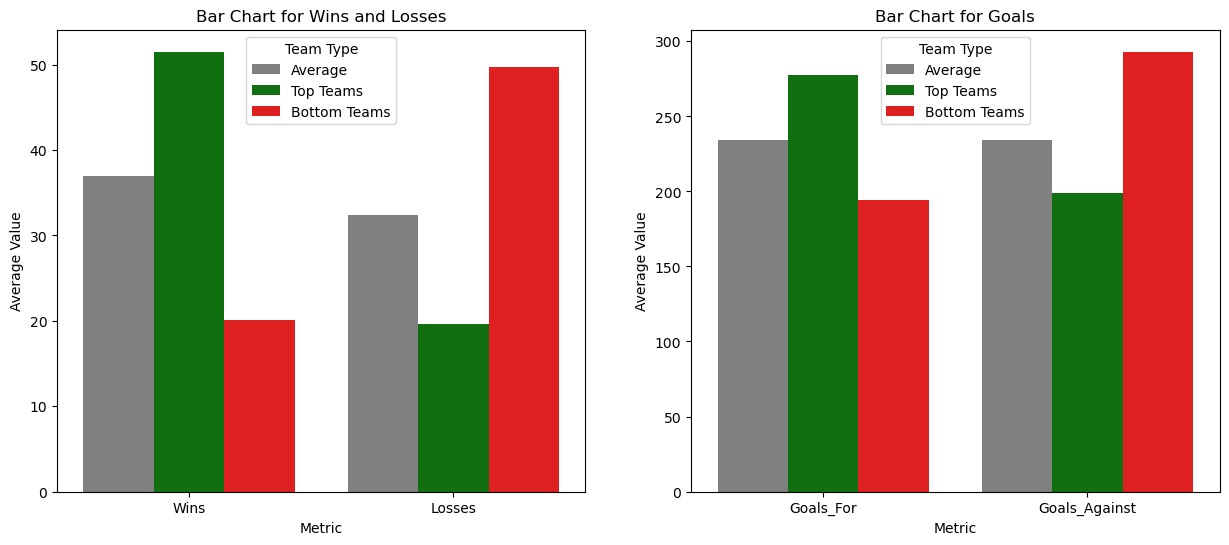

In [274]:
bar_plot_wins_losses = pd.DataFrame({
    'Team Type': ['Average', 'Top Teams', 'Bottom Teams'],
    'Wins': [df['Wins'].mean(), df_top['Wins'].mean(), df_bottom['Wins'].mean()],
    'Losses': [df['Losses'].mean(), df_top['Losses'].mean(), df_bottom['Losses'].mean()]
})

bar_plot_goals = pd.DataFrame({
    'Team Type': ['Average', 'Top Teams', 'Bottom Teams'],
    'Goals_For': [df['Goals_For'].mean(), df_top['Goals_For'].mean(), df_bottom['Goals_For'].mean()],
    'Goals_Against': [df['Goals_Against'].mean(), df_top['Goals_Against'].mean(), df_bottom['Goals_Against'].mean()]
})

bar_plot_wins_losses_melted = bar_plot_wins_losses.melt(id_vars='Team Type', var_name='Metric', value_name='Average Value')
bar_plot_goals_melted = bar_plot_goals.melt(id_vars='Team Type', var_name='Metric', value_name='Average Value')


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Metric', y='Average Value', hue='Team Type', data=bar_plot_wins_losses_melted, palette = ['grey', 'green', 'red'])
plt.title('Bar Chart for Wins and Losses')

plt.subplot(1, 2, 2)
sns.barplot(x='Metric', y='Average Value', hue='Team Type', data=bar_plot_goals_melted, palette = ['grey', 'green', 'red'])
plt.title('Bar Chart for Goals')


